In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../inputa/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/quora-question-pairs/train.csv.zip
/kaggle/input/quora-question-pairs/sample_submission.csv.zip
/kaggle/input/quora-question-pairs/test.csv
/kaggle/input/quora-question-pairs/test.csv.zip


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import zipfile
import pandas as pd

# Path to the zip file
zip_file_path = '/kaggle/input/quora-question-pairs/train.csv.zip'

# Destination folder where the unzipped files will be stored
destination_folder = '/kaggle/working/'

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

# Path to the extracted CSV file
csv_file_path = destination_folder + 'train.csv'

# Reading the CSV file
df = pd.read_csv(csv_file_path)

# Display the dataframe
df.head()


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df=pd.read_csv('/kaggle/working/train.csv')

In [5]:
df.shape

(404290, 6)

In [6]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


# Initial EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [8]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

check if there is a row that is entired empty or not.

In [9]:
df.dropna(inplace=True)

In [10]:
df.duplicated().sum()

0

is_duplicate
0    255024
1    149263
Name: count, dtype: int64
is_duplicate
0    63.079941
1    36.920059
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

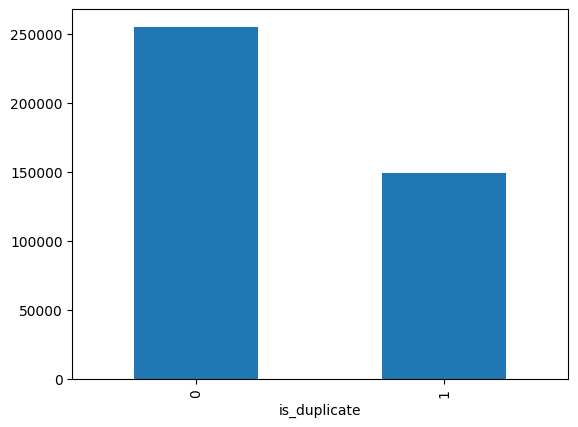

In [11]:
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [12]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions:',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated:',x[x].shape[0])

Number of unique questions: 537929
Number of questions getting repeated: 111778


<function matplotlib.pyplot.show(close=None, block=None)>

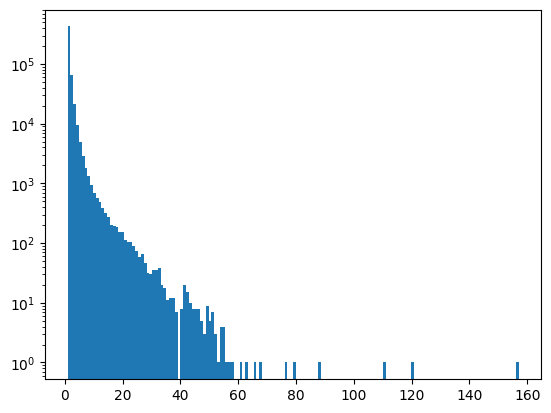

In [13]:
#Repeated question histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show

# Only Bow

In [14]:
new_df=df.sample(30000)

In [15]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
201010,201010,5293,13250,Which equation in general relativity predicted...,Although light beam bouncing between two plate...,0
390714,390714,523249,523250,Which gaming console should I buy?,Which handheld gaming console should I buy now?,1
36406,36406,66392,66393,"If a Zombie Outbreak/Apocalypse happened, what...",What is the best zombie killing weapon?,1
190852,190852,290042,290043,What is the truth about ins godavari and pns b...,How does the five day selection process in the...,0
90808,90808,83157,16048,How can I add unlimited resources in my 8 Ball...,How do I get more coins in 8 ball pool miniclip?,1


In [16]:
ques_df=new_df[['question1','question2']]
ques_df

,question1,question2
201010,Which equation in general relativity predicted...,Although light beam bouncing between two plate...
390714,Which gaming console should I buy?,Which handheld gaming console should I buy now?
36406,"If a Zombie Outbreak/Apocalypse happened, what...",What is the best zombie killing weapon?
190852,What is the truth about ins godavari and pns b...,How does the five day selection process in the...
90808,How can I add unlimited resources in my 8 Ball...,How do I get more coins in 8 ball pool miniclip?
...,...,...
269529,What is the aim?,What is aim of business?
353410,What is the molar mass of ice?,What is the molar mass of HCl?
371751,Can one man change the world?,Can one person really change the world?
266039,"What is the meaning of PQWL, RLWL, GNWL, RLGN,...",What is RLWL in railways?


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

# Ensure ques_df is loaded with 'question1' and 'question2' columns
# ques_df = pd.read_csv('path_to_csv')

# Concatenate question1 and question2 side by side
questions = list(ques_df['question1']) + list(ques_df['question2'])

# Initialize CountVectorizer
cv = CountVectorizer(max_features=3000)

# Transform the questions
transformed_questions = cv.fit_transform(questions).toarray()

# Split the transformed data
q1_arr = transformed_questions[:len(ques_df)]
q2_arr = transformed_questions[len(ques_df):]

# Create DataFrames with matching indices
temp_df1 = pd.DataFrame(q1_arr, index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index=ques_df.index)

# Concatenate the DataFrames along the columns
temp_df = pd.concat([temp_df1, temp_df2], axis=1)

# Check the shape of the final DataFrame
print(temp_df.shape)


(30000, 6000)


In [18]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
201010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
390714,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36406,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
190852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90808,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269529,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
353410,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
371751,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
266039,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
temp_df['is_duplicated']=new_df['is_duplicate']

In [20]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicated
201010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
390714,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
36406,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
190852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90808,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7396666666666667

In [23]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7256666666666667

In [24]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np


# Custom transformer to create temp_df
class CreateTempDFTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # X is expected to be a list of two arrays (q1_arr and q2_arr)
        q1_arr, q2_arr = X

        # Create DataFrames with matching indices
        temp_df1 = pd.DataFrame(q1_arr)
        temp_df2 = pd.DataFrame(q2_arr)
        
        # Concatenate the DataFrames along the columns
        temp_df = pd.concat([temp_df1, temp_df2], axis=1)
        
        # Add the 'is_duplicate' column from new_df
        temp_df['is_duplicate'] = new_df['is_duplicate'].reset_index(drop=True)
        
        return temp_df

# Custom transformer to split the DataFrame into train and test sets and train the model
class TrainTestSplitTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, test_size=0.2, random_state=42):
        self.test_size = test_size
        self.random_state = random_state
        self.model = RandomForestClassifier(n_estimators=100, random_state=42)
        
    def fit(self, X, y=None):
        # Split the data into training and testing sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X.drop(columns='is_duplicate'),
            X['is_duplicate'],
            test_size=self.test_size,
            random_state=self.random_state
        )
        
        # Train the model on the training data
        self.model.fit(self.X_train, self.y_train)
        return self
    
    def transform(self, X):
        # Evaluate the model on the test data
        accuracy = self.model.score(self.X_test, self.y_test)
        print(f'Accuracy: {accuracy:.2f}')
        
        # Predict using the trained model
        predictions = self.model.predict(self.X_test)
        print('Predictions:', predictions)
        
        return X

# Create the pipeline
pipeline = Pipeline([
    ('features', FeatureUnion(
        transformer_list=[
            ('vectorizer_q1', Pipeline([
                ('extract_q1', ColumnTransformer([
                    ('cv', CountVectorizer(max_features=3000), 'question1')
                ], remainder='drop'))
            ])),
            ('vectorizer_q2', Pipeline([
                ('extract_q2', ColumnTransformer([
                    ('cv', CountVectorizer(max_features=3000), 'question2')
                ], remainder='drop'))
            ]))
        ]
    )),
    ('split_features', FunctionTransformer(lambda X: [
        X[:, :3000],  # First half for question1
        X[:, 3000:]  # Second half for question2
    ], validate=False)),
    ('create_temp_df', CreateTempDFTransformer()),
    ('train_test_split', TrainTestSplitTransformer())
])
pipeline

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('vectorizer_q1',
                                                 Pipeline(steps=[('extract_q1',
                                                                  ColumnTransformer(transformers=[('cv',
                                                                                                   CountVectorizer(max_features=3000),
                                                                                                   'question1')]))])),
                                                ('vectorizer_q2',
                                                 Pipeline(steps=[('extract_q2',
                                                                  ColumnTransformer(transformers=[('cv',
                                                                                                   CountVectorizer(max_features=3000),
                                                                                                   'question2')]))]))])),
                ('split_features',
                 FunctionTransformer(func=<function <lambda> at 0x7aac51c38430>)),
                ('create_temp_df', CreateTempDFTransformer()),
                ('train_test_split', TrainTestSplitTransformer())])

# BOW with basic features

In [25]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
201010,201010,5293,13250,Which equation in general relativity predicted...,Although light beam bouncing between two plate...,0
390714,390714,523249,523250,Which gaming console should I buy?,Which handheld gaming console should I buy now?,1
36406,36406,66392,66393,"If a Zombie Outbreak/Apocalypse happened, what...",What is the best zombie killing weapon?,1
190852,190852,290042,290043,What is the truth about ins godavari and pns b...,How does the five day selection process in the...,0
90808,90808,83157,16048,How can I add unlimited resources in my 8 Ball...,How do I get more coins in 8 ball pool miniclip?,1


In [26]:
new_df.shape

(30000, 6)

is_duplicate
0    19025
1    10975
Name: count, dtype: int64
is_duplicate
0    63.416667
1    36.583333
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

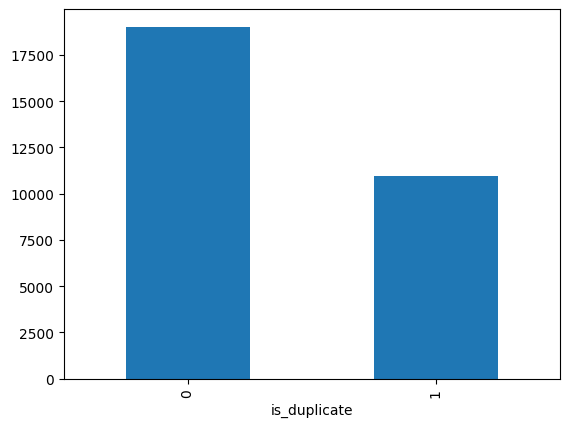

In [27]:
# Distribution of duplicate and non-duplicate questions

print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [28]:
# Repeated questions

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions:',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated:',x[x].shape[0])

Number of unique questions: 55430
Number of questions getting repeated: 3385


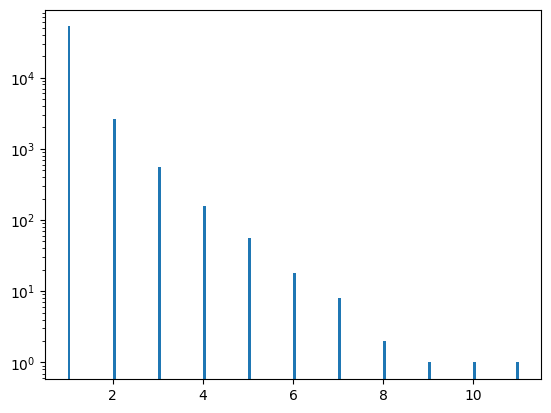

In [29]:
# Repeated question histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

# Feature Engineering
we will create some more columns

* q1_len=number of character in question1
* q2_len=number of character in question2
* q1_num_words=number of words in question1
* q2_num_words=number of words in question2
* common_words=number of common words in question1 and question2
* total_words=total number of words in question 1 and question2
* word_share=Ratio of common_words and total_words

In [30]:
new_df['q1_len']=new_df['question1'].str.len()
new_df['q2_len']=new_df['question2'].str.len()

In [31]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
201010,201010,5293,13250,Which equation in general relativity predicted...,Although light beam bouncing between two plate...,0,77,146
390714,390714,523249,523250,Which gaming console should I buy?,Which handheld gaming console should I buy now?,1,34,47
36406,36406,66392,66393,"If a Zombie Outbreak/Apocalypse happened, what...",What is the best zombie killing weapon?,1,89,39
190852,190852,290042,290043,What is the truth about ins godavari and pns b...,How does the five day selection process in the...,0,57,61
90808,90808,83157,16048,How can I add unlimited resources in my 8 Ball...,How do I get more coins in 8 ball pool miniclip?,1,62,48


In [32]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
201010,201010,5293,13250,Which equation in general relativity predicted...,Although light beam bouncing between two plate...,0,77,146,11,24
390714,390714,523249,523250,Which gaming console should I buy?,Which handheld gaming console should I buy now?,1,34,47,6,8
36406,36406,66392,66393,"If a Zombie Outbreak/Apocalypse happened, what...",What is the best zombie killing weapon?,1,89,39,15,7
190852,190852,290042,290043,What is the truth about ins godavari and pns b...,How does the five day selection process in the...,0,57,61,11,12
90808,90808,83157,16048,How can I add unlimited resources in my 8 Ball...,How do I get more coins in 8 ball pool miniclip?,1,62,48,13,11


In [33]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [34]:
new_df['common_words']=new_df.apply(common_words,axis=1)

In [35]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words
201010,201010,5293,13250,Which equation in general relativity predicted...,Although light beam bouncing between two plate...,0,77,146,11,24,0
390714,390714,523249,523250,Which gaming console should I buy?,Which handheld gaming console should I buy now?,1,34,47,6,8,5
36406,36406,66392,66393,"If a Zombie Outbreak/Apocalypse happened, what...",What is the best zombie killing weapon?,1,89,39,15,7,4
190852,190852,290042,290043,What is the truth about ins godavari and pns b...,How does the five day selection process in the...,0,57,61,11,12,1
90808,90808,83157,16048,How can I add unlimited resources in my 8 Ball...,How do I get more coins in 8 ball pool miniclip?,1,62,48,13,11,6


In [36]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words
201010,201010,5293,13250,Which equation in general relativity predicted...,Although light beam bouncing between two plate...,0,77,146,11,24,0
390714,390714,523249,523250,Which gaming console should I buy?,Which handheld gaming console should I buy now?,1,34,47,6,8,5
36406,36406,66392,66393,"If a Zombie Outbreak/Apocalypse happened, what...",What is the best zombie killing weapon?,1,89,39,15,7,4
190852,190852,290042,290043,What is the truth about ins godavari and pns b...,How does the five day selection process in the...,0,57,61,11,12,1
90808,90808,83157,16048,How can I add unlimited resources in my 8 Ball...,How do I get more coins in 8 ball pool miniclip?,1,62,48,13,11,6
...,...,...,...,...,...,...,...,...,...,...,...
269529,269529,1242,387249,What is the aim?,What is aim of business?,0,16,24,4,5,2
353410,353410,273412,482466,What is the molar mass of ice?,What is the molar mass of HCl?,0,30,30,7,7,6
371751,371751,151047,265391,Can one man change the world?,Can one person really change the world?,1,29,39,6,7,5
266039,266039,23039,383141,"What is the meaning of PQWL, RLWL, GNWL, RLGN,...",What is RLWL in railways?,0,85,25,16,5,3


In [37]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [38]:
new_df['total_words']=new_df.apply(total_words,axis=1)

In [39]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words
201010,201010,5293,13250,Which equation in general relativity predicted...,Although light beam bouncing between two plate...,0,77,146,11,24,0,35
390714,390714,523249,523250,Which gaming console should I buy?,Which handheld gaming console should I buy now?,1,34,47,6,8,5,14
36406,36406,66392,66393,"If a Zombie Outbreak/Apocalypse happened, what...",What is the best zombie killing weapon?,1,89,39,15,7,4,21
190852,190852,290042,290043,What is the truth about ins godavari and pns b...,How does the five day selection process in the...,0,57,61,11,12,1,22
90808,90808,83157,16048,How can I add unlimited resources in my 8 Ball...,How do I get more coins in 8 ball pool miniclip?,1,62,48,13,11,6,24


In [40]:
new_df['word_share']=round(new_df['common_words']/new_df['total_words'],2)

In [41]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share
201010,201010,5293,13250,Which equation in general relativity predicted...,Although light beam bouncing between two plate...,0,77,146,11,24,0,35,0.00
390714,390714,523249,523250,Which gaming console should I buy?,Which handheld gaming console should I buy now?,1,34,47,6,8,5,14,0.36
36406,36406,66392,66393,"If a Zombie Outbreak/Apocalypse happened, what...",What is the best zombie killing weapon?,1,89,39,15,7,4,21,0.19
190852,190852,290042,290043,What is the truth about ins godavari and pns b...,How does the five day selection process in the...,0,57,61,11,12,1,22,0.05
90808,90808,83157,16048,How can I add unlimited resources in my 8 Ball...,How do I get more coins in 8 ball pool miniclip?,1,62,48,13,11,6,24,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
269529,269529,1242,387249,What is the aim?,What is aim of business?,0,16,24,4,5,2,9,0.22
353410,353410,273412,482466,What is the molar mass of ice?,What is the molar mass of HCl?,0,30,30,7,7,6,14,0.43
371751,371751,151047,265391,Can one man change the world?,Can one person really change the world?,1,29,39,6,7,5,13,0.38
266039,266039,23039,383141,"What is the meaning of PQWL, RLWL, GNWL, RLGN,...",What is RLWL in railways?,0,85,25,16,5,3,21,0.14


In [42]:
new_df.describe()

,id,qid1,qid2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000
mean,200876.273567,216912.752700,220338.415167,0.365833,59.440900,60.221433,10.928467,11.20570,4.505667,21.130733,0.222672
std,116708.256607,157854.091798,159595.752450,0.481671,29.657114,34.842350,5.370038,6.53181,3.120421,8.587233,0.128310
min,31.000000,4.000000,17.000000,0.000000,1.000000,11.000000,1.000000,2.00000,0.000000,5.000000,0.000000
25%,100970.500000,74082.750000,74649.750000,0.000000,39.000000,39.000000,7.000000,7.00000,2.000000,15.000000,0.120000
50%,199818.000000,192045.500000,196994.500000,0.000000,52.000000,51.000000,10.000000,10.00000,4.000000,19.000000,0.210000
75%,301541.000000,345813.000000,352969.250000,1.000000,71.000000,72.000000,13.000000,13.00000,6.000000,25.000000,0.320000
max,404282.000000,537915.000000,537916.000000,1.000000,343.000000,1151.000000,66.000000,237.00000,38.000000,155.000000,0.500000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


minimum characters 1
maximum characters 343
average num of characters 59


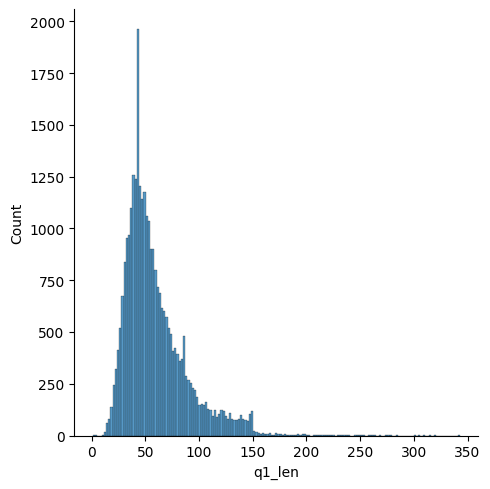

In [43]:
# Analysis of features
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

# Analysis of features

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


minimum characters 1
maximum characters 343
average num of characters 59


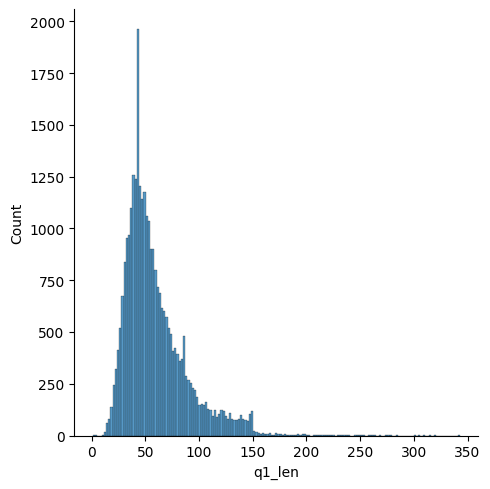

In [44]:
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


minimum characters 11
maximum characters 1151
average num of characters 60


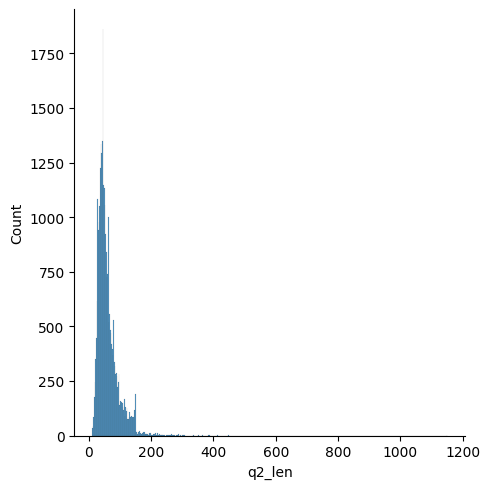

In [45]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


minimum characters 1
maximum characters 66
average num of characters 10


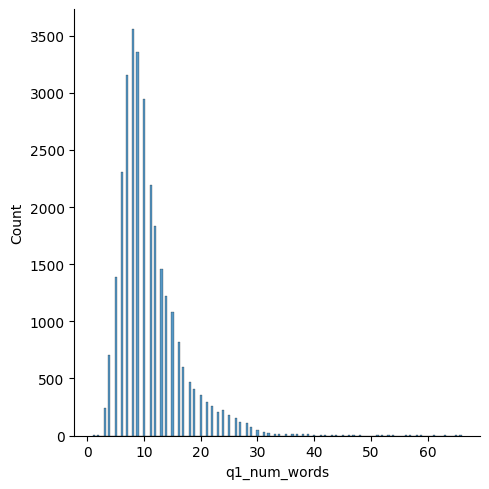

In [46]:
# Analysis of features
sns.displot(new_df['q1_num_words'])
print('minimum characters',new_df['q1_num_words'].min())
print('maximum characters',new_df['q1_num_words'].max())
print('average num of characters',int(new_df['q1_num_words'].mean()))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


minimum characters 2
maximum characters 237
average num of characters 11


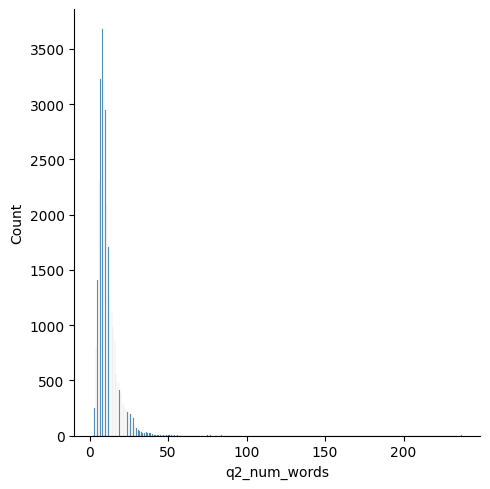

In [47]:
# Analysis of features
sns.displot(new_df['q2_num_words'])
print('minimum characters',new_df['q2_num_words'].min())
print('maximum characters',new_df['q2_num_words'].max())
print('average num of characters',int(new_df['q2_num_words'].mean()))

/tmp/ipykernel_33/771695141.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['common_words'],label='non duplicate')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_33/771695141.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `hi

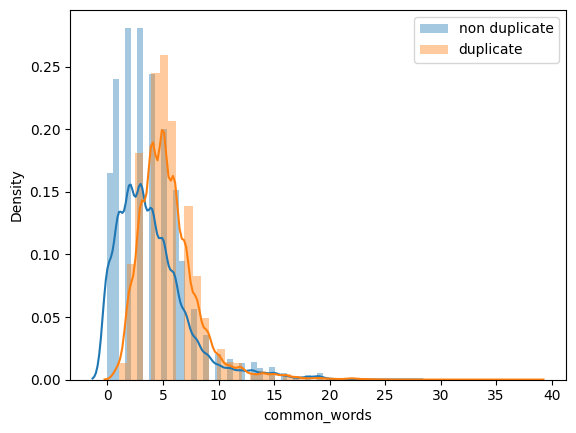

In [48]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['common_words'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['common_words'],label='duplicate')
plt.legend()
plt.show()

/tmp/ipykernel_33/1446561759.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['total_words'],label='non duplicate')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_33/1446561759.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `h

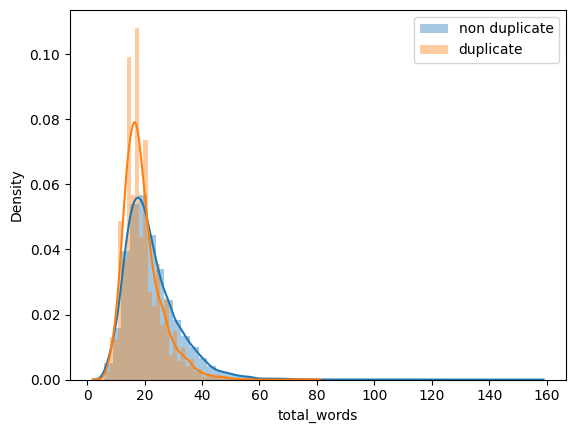

In [49]:
# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['total_words'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['total_words'],label='duplicate')
plt.legend()
plt.show()

/tmp/ipykernel_33/542246512.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_33/542246512.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `hist

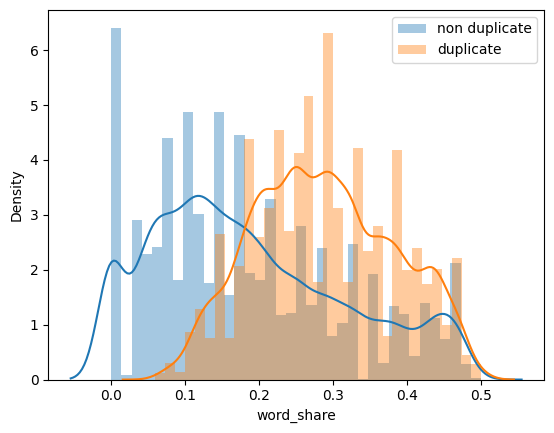

In [50]:
# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [51]:
final_df=new_df.drop(columns=['id','qid1','qid2','question1','question2'])

In [52]:
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share
201010,0,77,146,11,24,0,35,0.00
390714,1,34,47,6,8,5,14,0.36
36406,1,89,39,15,7,4,21,0.19
190852,0,57,61,11,12,1,22,0.05
90808,1,62,48,13,11,6,24,0.25


In [53]:
ques_df

,question1,question2
201010,Which equation in general relativity predicted...,Although light beam bouncing between two plate...
390714,Which gaming console should I buy?,Which handheld gaming console should I buy now?
36406,"If a Zombie Outbreak/Apocalypse happened, what...",What is the best zombie killing weapon?
190852,What is the truth about ins godavari and pns b...,How does the five day selection process in the...
90808,How can I add unlimited resources in my 8 Ball...,How do I get more coins in 8 ball pool miniclip?
...,...,...
269529,What is the aim?,What is aim of business?
353410,What is the molar mass of ice?,What is the molar mass of HCl?
371751,Can one man change the world?,Can one person really change the world?
266039,"What is the meaning of PQWL, RLWL, GNWL, RLGN,...",What is RLWL in railways?


In [54]:
from sklearn.feature_extraction.text import CountVectorizer

# Ensure ques_df is loaded with 'question1' and 'question2' columns
# ques_df = pd.read_csv('path_to_csv')

# Concatenate question1 and question2 side by side
questions = list(ques_df['question1']) + list(ques_df['question2'])

# Initialize CountVectorizer
cv = CountVectorizer(max_features=3000)

# Transform the questions
transformed_questions = cv.fit_transform(questions).toarray()

# Split the transformed data
q1_arr = transformed_questions[:len(ques_df)]
q2_arr = transformed_questions[len(ques_df):]

# Create DataFrames with matching indices
temp_df1 = pd.DataFrame(q1_arr, index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index=ques_df.index)

# Concatenate the DataFrames along the columns
temp_df = pd.concat([temp_df1, temp_df2], axis=1)

# Check the shape of the final DataFrame
print(temp_df.shape)


(30000, 6000)


In [55]:
final_df=pd.concat([final_df,temp_df],axis=1)

In [56]:
final_df.shape

(30000, 6008)

In [57]:
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
201010,0,77,146,11,24,0,35,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
390714,1,34,47,6,8,5,14,0.36,0,0,...,0,0,0,0,0,0,0,0,0,0
36406,1,89,39,15,7,4,21,0.19,0,0,...,0,0,0,0,0,0,0,0,0,0
190852,0,57,61,11,12,1,22,0.05,0,0,...,0,0,0,0,0,0,0,0,0,0
90808,1,62,48,13,11,6,24,0.25,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [59]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.769

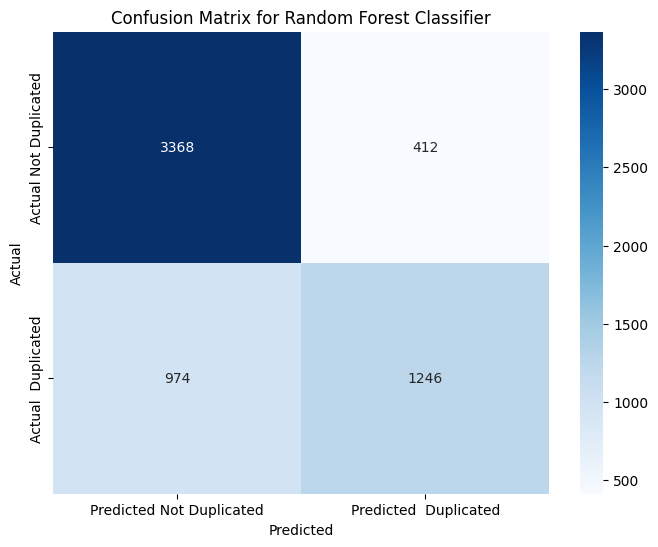

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Not Duplicated', 'Predicted  Duplicated'], yticklabels=['Actual Not Duplicated', 'Actual  Duplicated'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [61]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7701666666666667

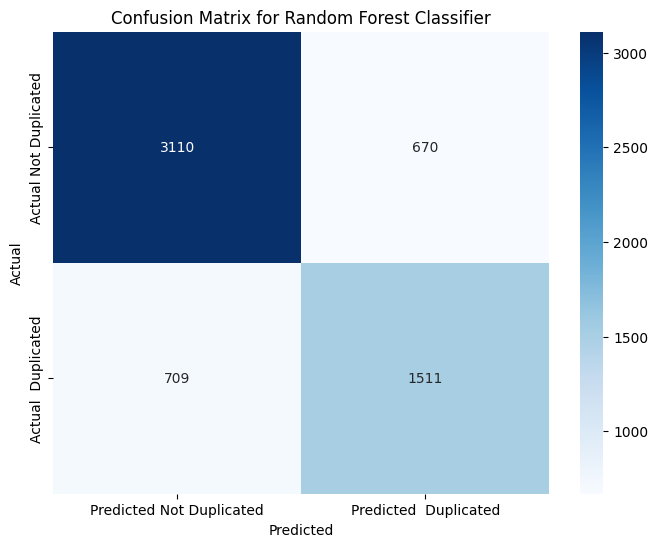

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Not Duplicated', 'Predicted  Duplicated'], yticklabels=['Actual Not Duplicated', 'Actual  Duplicated'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

## Conclusion:

Upon comparing the two models, we observe that although the accuracy scores of both models are nearly the same, the Random Forest Classifier is superior. This is because it has a lower number of errors where the model predicts a duplicate (positive) but in reality, it is not a duplicate (negative). This specific kind of error is known as a Type I error (false positive).

# Advanced Features


### 1. Token Features
- **cwc_min**: This is the ratio of the number of common words to the length of the smaller question
- **cwc_max**: This is the ratio of the number of common words to the length of the larger question
- **csc_min**: This is the ratio of the number of common stop words to the smaller stop word count among the two questions
- **csc_max**: This is the ratio of the number of common stop words to the larger stop word count among the two questions
- **ctc_min**: This is the ratio of the number of common tokens to the smaller token count among the two questions
- **ctc_max**: This is the ratio of the number of common tokens to the larger token count among the two questions
- **last_word_eq**: 1 if the last word in the two questions is same, 0 otherwise
- **first_word_eq**: 1 if the first word in the two questions is same, 0 otherwise

### 2. Length Based Features
- **mean_len**: Mean of the length of the two questions (number of words)
- **abs_len_diff**: Absolute difference between the length of the two questions (number of words)
- **longest_substr_ratio**: Ratio of the length of the longest substring among the two questions to the length of the smaller question

### 3. Fuzzy Features
- **fuzz_ratio**: fuzz_ratio score from fuzzywuzzy
- **fuzz_partial_ratio**: fuzz_partial_ratio from fuzzywuzzy
- **token_sort_ratio**: token_sort_ratio from fuzzywuzzy
- **token_set_ratio**: token_set_ratio from fuzzywuzzy

In [63]:
import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [64]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q
    

In [65]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

In [66]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share
201010,201010,5293,13250,Which equation in general relativity predicted...,Although light beam bouncing between two plate...,0,77,146,11,24,0,35,0.00
390714,390714,523249,523250,Which gaming console should I buy?,Which handheld gaming console should I buy now?,1,34,47,6,8,5,14,0.36
36406,36406,66392,66393,"If a Zombie Outbreak/Apocalypse happened, what...",What is the best zombie killing weapon?,1,89,39,15,7,4,21,0.19
190852,190852,290042,290043,What is the truth about ins godavari and pns b...,How does the five day selection process in the...,0,57,61,11,12,1,22,0.05
90808,90808,83157,16048,How can I add unlimited resources in my 8 Ball...,How do I get more coins in 8 ball pool miniclip?,1,62,48,13,11,6,24,0.25


In [67]:
new_df['question1']=new_df['question1'].apply(preprocess)
new_df['question2']=new_df['question2'].apply(preprocess)

In [68]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share
201010,201010,5293,13250,which equation in general relativity predicted...,although light beam bouncing between two plate...,0,77,146,11,24,0,35,0.00
390714,390714,523249,523250,which gaming console should i buy,which handheld gaming console should i buy now,1,34,47,6,8,5,14,0.36
36406,36406,66392,66393,if a zombie outbreak apocalypse happened what...,what is the best zombie killing weapon,1,89,39,15,7,4,21,0.19
190852,190852,290042,290043,what is the truth about ins godavari and pns b...,how does the five day selection process in the...,0,57,61,11,12,1,22,0.05
90808,90808,83157,16048,how can i add unlimited resources in my 8 ball...,how do i get more coins in 8 ball pool miniclip,1,62,48,13,11,6,24,0.25


### Advanced Features

In [69]:

from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features


In [70]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [71]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,total_words,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
201010,201010,5293,13250,which equation in general relativity predicted...,although light beam bouncing between two plate...,0,77,146,11,24,...,35,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
390714,390714,523249,523250,which gaming console should i buy,which handheld gaming console should i buy now,1,34,47,6,8,...,14,0.36,0.999967,0.749981,0.999967,0.749981,0.999983,0.749991,0.0,1.0
36406,36406,66392,66393,if a zombie outbreak apocalypse happened what...,what is the best zombie killing weapon,1,89,39,15,7,...,21,0.19,0.499988,0.222220,0.666644,0.333328,0.571420,0.249998,0.0,0.0
190852,190852,290042,290043,what is the truth about ins godavari and pns b...,how does the five day selection process in the...,0,57,61,11,12,...,22,0.05,0.000000,0.000000,0.399992,0.399992,0.181817,0.166665,0.0,0.0
90808,90808,83157,16048,how can i add unlimited resources in my 8 ball...,how do i get more coins in 8 ball pool miniclip,1,62,48,13,11,...,24,0.25,0.499992,0.374995,0.599988,0.599988,0.545450,0.461535,0.0,1.0


In [72]:
pip install distance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 3.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16258 sha256=f4bb5f54a8df3a4f335c57c2dc9904e626e45be5359091875d89747cb615ae19
  Stored in directory: /root/.cache/pip/wheels/e8/bb/de/f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built distance
Note: you may need to restart the kernel to use updated packages.


In [73]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features
    

In [74]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [75]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
201010,201010,5293,13250,which equation in general relativity predicted...,although light beam bouncing between two plate...,0,77,146,11,24,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,13.0,17.5,0.078947
390714,390714,523249,523250,which gaming console should i buy,which handheld gaming console should i buy now,1,34,47,6,8,...,0.749981,0.999967,0.749981,0.999983,0.749991,0.0,1.0,2.0,7.0,0.823529
36406,36406,66392,66393,if a zombie outbreak apocalypse happened what...,what is the best zombie killing weapon,1,89,39,15,7,...,0.222220,0.666644,0.333328,0.571420,0.249998,0.0,0.0,9.0,11.5,0.256410
190852,190852,290042,290043,what is the truth about ins godavari and pns b...,how does the five day selection process in the...,0,57,61,11,12,...,0.000000,0.399992,0.399992,0.181817,0.166665,0.0,0.0,1.0,11.5,0.105263
90808,90808,83157,16048,how can i add unlimited resources in my 8 ball...,how do i get more coins in 8 ball pool miniclip,1,62,48,13,11,...,0.374995,0.599988,0.599988,0.545450,0.461535,0.0,1.0,2.0,12.0,0.270833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269529,269529,1242,387249,what is the aim,what is aim of business,0,16,24,4,5,...,0.499975,0.666644,0.666644,0.749981,0.599988,0.0,1.0,1.0,4.5,0.500000
353410,353410,273412,482466,what is the molar mass of ice,what is the molar mass of hcl,0,30,30,7,7,...,0.666644,0.999975,0.999975,0.857131,0.857131,0.0,1.0,0.0,7.0,0.866667
371751,371751,151047,265391,can one man change the world,can one person really change the world,1,29,39,6,7,...,0.599988,0.999950,0.999950,0.833319,0.714276,1.0,1.0,1.0,6.5,0.586207
266039,266039,23039,383141,what is the meaning of pqwl rlwl gnwl rlgn ...,what is rlwl in railways,0,85,25,16,5,...,0.099999,0.999967,0.499992,0.799984,0.249998,0.0,1.0,11.0,10.5,0.320000


In [76]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [77]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [78]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
201010,201010,5293,13250,which equation in general relativity predicted...,although light beam bouncing between two plate...,0,77,146,11,24,...,0.000000,0.0,0.0,13.0,17.5,0.078947,25,37,26,26
390714,390714,523249,523250,which gaming console should i buy,which handheld gaming console should i buy now,1,34,47,6,8,...,0.749991,0.0,1.0,2.0,7.0,0.823529,84,88,84,100
36406,36406,66392,66393,if a zombie outbreak apocalypse happened what...,what is the best zombie killing weapon,1,89,39,15,7,...,0.249998,0.0,0.0,9.0,11.5,0.256410,37,61,47,69
190852,190852,290042,290043,what is the truth about ins godavari and pns b...,how does the five day selection process in the...,0,57,61,11,12,...,0.166665,0.0,0.0,1.0,11.5,0.105263,31,34,47,41
90808,90808,83157,16048,how can i add unlimited resources in my 8 ball...,how do i get more coins in 8 ball pool miniclip,1,62,48,13,11,...,0.461535,0.0,1.0,2.0,12.0,0.270833,56,55,52,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269529,269529,1242,387249,what is the aim,what is aim of business,0,16,24,4,5,...,0.599988,0.0,1.0,1.0,4.5,0.500000,58,73,63,85
353410,353410,273412,482466,what is the molar mass of ice,what is the molar mass of hcl,0,30,30,7,7,...,0.857131,0.0,1.0,0.0,7.0,0.866667,93,93,93,93
371751,371751,151047,265391,can one man change the world,can one person really change the world,1,29,39,6,7,...,0.714276,1.0,1.0,1.0,6.5,0.586207,79,75,73,92
266039,266039,23039,383141,what is the meaning of pqwl rlwl gnwl rlgn ...,what is rlwl in railways,0,85,25,16,5,...,0.249998,0.0,1.0,11.0,10.5,0.320000,44,58,45,77


In [ ]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

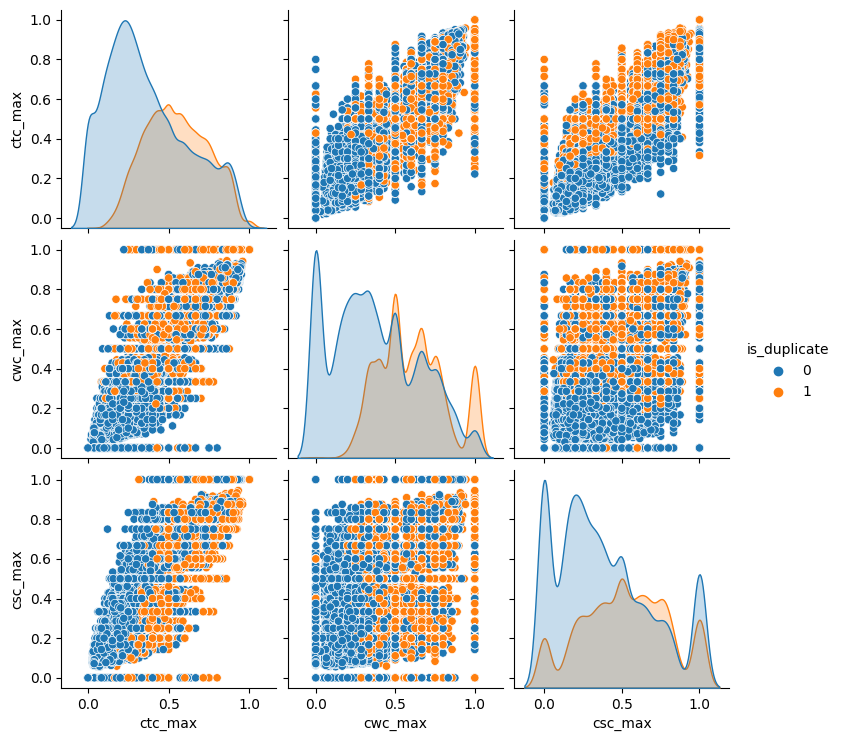

In [80]:
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

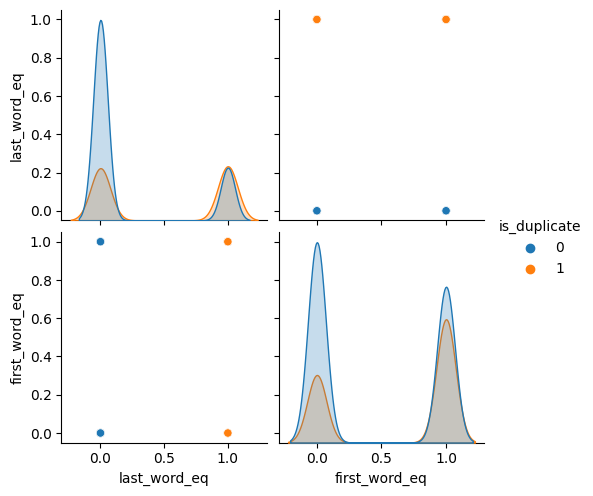

In [87]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

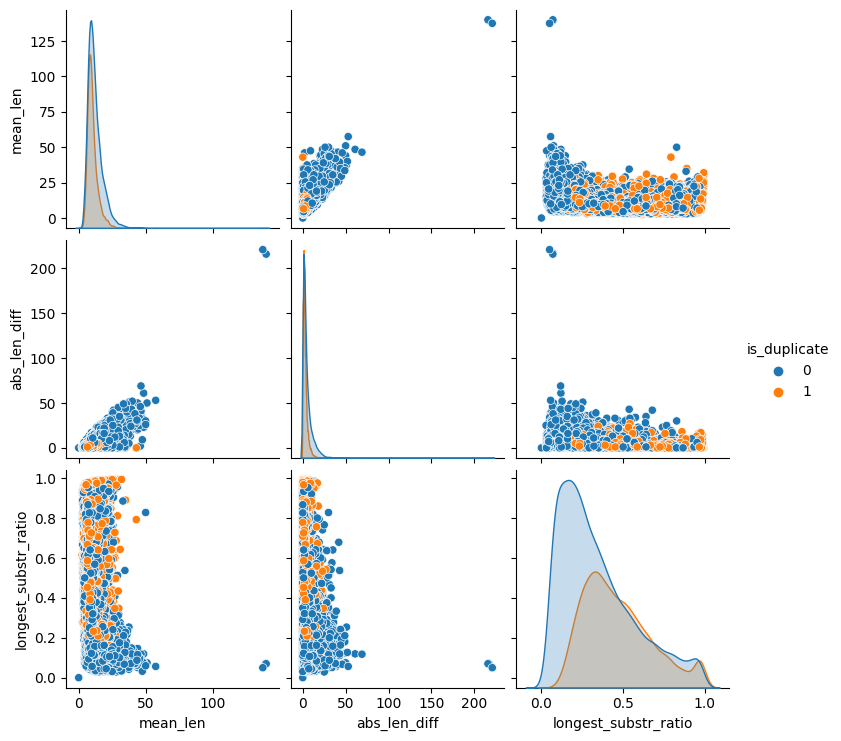

In [91]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

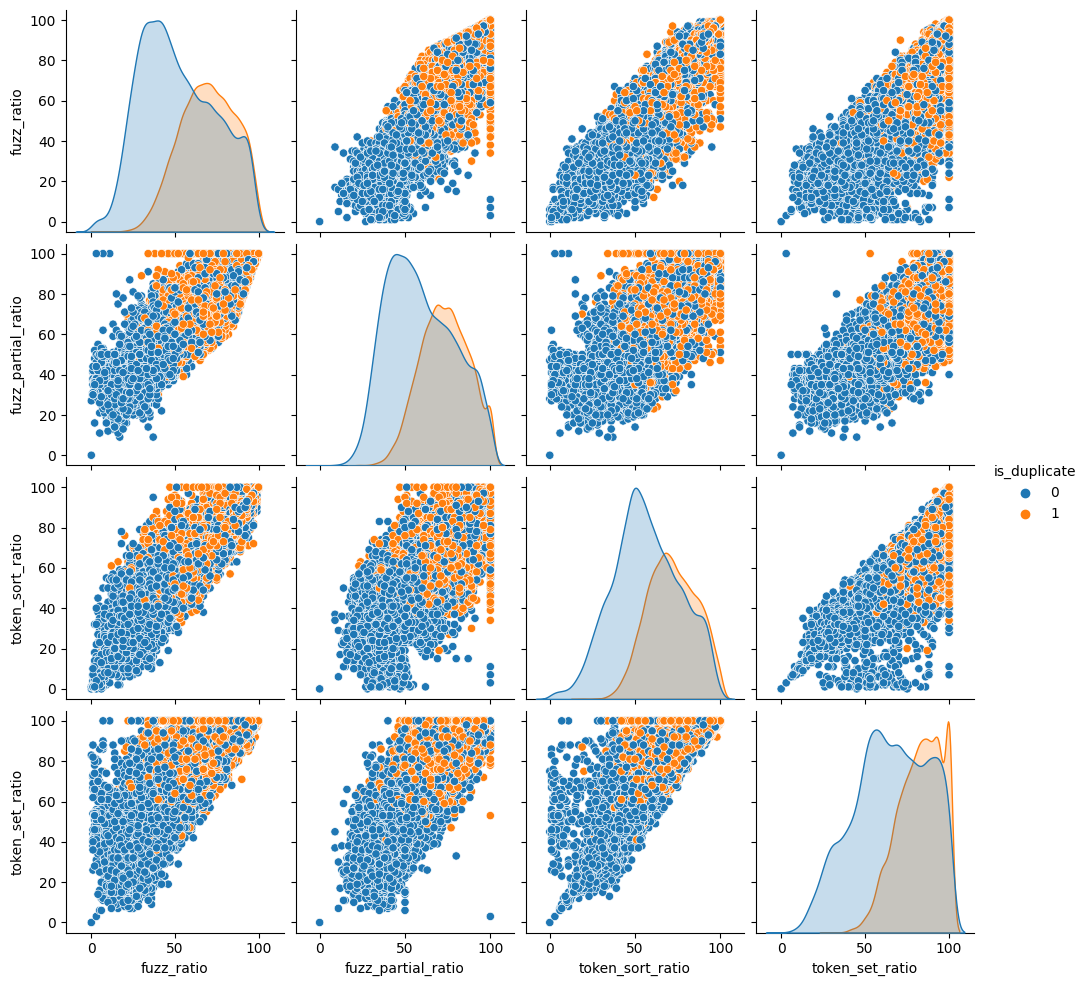

In [92]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

In [94]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 
'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 
'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_df['is_duplicate'].values

In [95]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.064s...
[t-SNE] Computed neighbors for 30000 samples in 6.680s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

In [ ]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])


In [96]:
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.064s...
[t-SNE] Computed neighbors for 30000 samples in 6.537s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

In [ ]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [97]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
201010,which equation in general relativity predicted...,although light beam bouncing between two plate...
390714,which gaming console should i buy,which handheld gaming console should i buy now
36406,if a zombie outbreak apocalypse happened what...,what is the best zombie killing weapon
190852,what is the truth about ins godavari and pns b...,how does the five day selection process in the...
90808,how can i add unlimited resources in my 8 ball...,how do i get more coins in 8 ball pool miniclip


In [98]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 23)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
201010,0,77,146,11,24,0,35,0.00,0.000000,0.000000,...,0.000000,0.0,0.0,13.0,17.5,0.078947,25,37,26,26
390714,1,34,47,6,8,5,14,0.36,0.999967,0.749981,...,0.749991,0.0,1.0,2.0,7.0,0.823529,84,88,84,100
36406,1,89,39,15,7,4,21,0.19,0.499988,0.222220,...,0.249998,0.0,0.0,9.0,11.5,0.256410,37,61,47,69
190852,0,57,61,11,12,1,22,0.05,0.000000,0.000000,...,0.166665,0.0,0.0,1.0,11.5,0.105263,31,34,47,41
90808,1,62,48,13,11,6,24,0.25,0.499992,0.374995,...,0.461535,0.0,1.0,2.0,12.0,0.270833,56,55,52,60


In [99]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [100]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [101]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6023)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
201010,0,77,146,11,24,0,35,0.00,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
390714,1,34,47,6,8,5,14,0.36,0.999967,0.749981,...,0,0,0,0,0,0,0,0,0,0
36406,1,89,39,15,7,4,21,0.19,0.499988,0.222220,...,0,0,0,0,0,0,0,0,0,0
190852,0,57,61,11,12,1,22,0.05,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
90808,1,62,48,13,11,6,24,0.25,0.499992,0.374995,...,0,0,0,0,0,0,0,0,0,0


In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7911666666666667

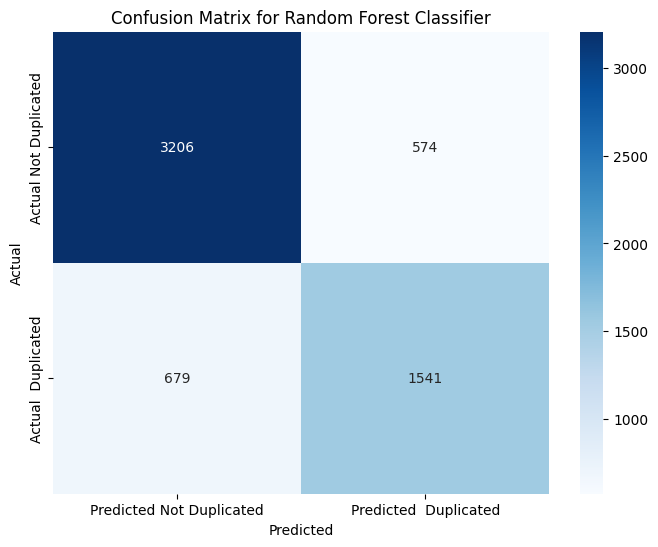

In [104]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Not Duplicated', 'Predicted  Duplicated'], yticklabels=['Actual Not Duplicated', 'Actual  Duplicated'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [105]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.8011666666666667

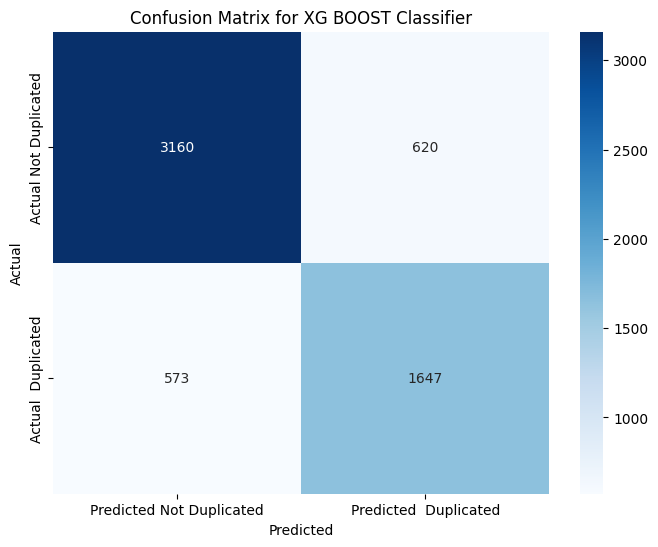

In [106]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred1)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Not Duplicated', 'Predicted  Duplicated'], yticklabels=['Actual Not Duplicated', 'Actual  Duplicated'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XG BOOST Classifier')
plt.show()

In [107]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [108]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [109]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features


In [110]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [111]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [112]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [113]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [114]:
rf.predict(query_point_creator(q2,q3))

array([0])

In [115]:
import pickle

pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))

## Submission File

In [116]:
test=pd.read_csv('/kaggle/input/quora-question-pairs/test.csv')

In [117]:
test.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [118]:
test.shape

(2345796, 3)

In [119]:
test['question1'][0]

'How does the Surface Pro himself 4 compare with iPad Pro?'

In [120]:
test['question2'][0]

'Why did Microsoft choose core m3 and not core i3 home Surface Pro 4?'

In [121]:
rf.predict(query_point_creator(test['question1'][0],test['question2'][0]))[0]

0

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize Logistic Regression model
lr = LogisticRegression()

# Train the Logistic Regression model
lr.fit(X_train, y_train)

# Predict the target labels for the test data
y_pred = lr.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.7348333333333333


In [123]:
submission=pd.DataFrame({
    'id':1,
    'question1':test['question1'][1],
    'question2':test['question2'][1],
    'isdulicated':rf.predict(query_point_creator(test['question1'][1],test['question2'][1]))
})

In [124]:
submission

,id,question1,question2,isdulicated
0,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?,0


In [125]:
test.head()


,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [126]:
import pandas as pd


data = []

# Iterate over the range of test DataFrame's rows
for i in range(1000):
    # Create a dictionary for each row
    row_data = {
        'id': i,
        'question1': test['question1'][i],
        'question2': test['question2'][i],
        'isduplicated': rf.predict(query_point_creator(test['question1'][i], test['question2'][i]))
    }
    # Append the row data to the list
    data.append(row_data)

# Create DataFrame from the list of dictionaries
submission = pd.DataFrame(data)

submission


,id,question1,question2,isduplicated
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...,[0]
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?,[0]
2,2,What but is the best way to send money from Ch...,What you send money to China?,[1]
3,3,Which food not emulsifiers?,What foods fibre?,[0]
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?,[1]
...,...,...,...,...
995,995,How is RAU's IAS study circle (Bangalore branc...,How Rau's IAS Study Circle in the Bangalore br...,[1]
996,996,"How NFL, can you try to kick a field goal on a...",What is the point of having good on the NFL go...,[0]
997,997,How do is campus life at St. Thomas College of...,How is campus life layer placements at St Thom...,[0]
998,998,How do I earn money with prefer?,What is on YouTube?,[0]


In [127]:
submission['isduplicated'] = submission['isduplicated'].apply(lambda x: x[0])


In [128]:
submission

,id,question1,question2,isduplicated
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...,0
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?,0
2,2,What but is the best way to send money from Ch...,What you send money to China?,1
3,3,Which food not emulsifiers?,What foods fibre?,0
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?,1
...,...,...,...,...
995,995,How is RAU's IAS study circle (Bangalore branc...,How Rau's IAS Study Circle in the Bangalore br...,1
996,996,"How NFL, can you try to kick a field goal on a...",What is the point of having good on the NFL go...,0
997,997,How do is campus life at St. Thomas College of...,How is campus life layer placements at St Thom...,0
998,998,How do I earn money with prefer?,What is on YouTube?,0


In [129]:
sub = submission.loc[:, ['id', 'isduplicated']]

In [130]:
sub

,id,isduplicated
0,0,0
1,1,0
2,2,1
3,3,0
4,4,1
...,...,...
995,995,1
996,996,0
997,997,0
998,998,0


In [131]:
sub.to_csv('submission.csv', index=False)